In [1]:
from barplots import barplots
import os
import pandas as pd
from glob import glob
import compress_pickle

In [2]:
bad_models = [
    "GF",
    "GAE",
    "DeepWalk",
    "Laplacian",
    "SVD",
    "LINE"
]

Rendering barplots:   0%|          | 0/12 [00:00<?, ?it/s]

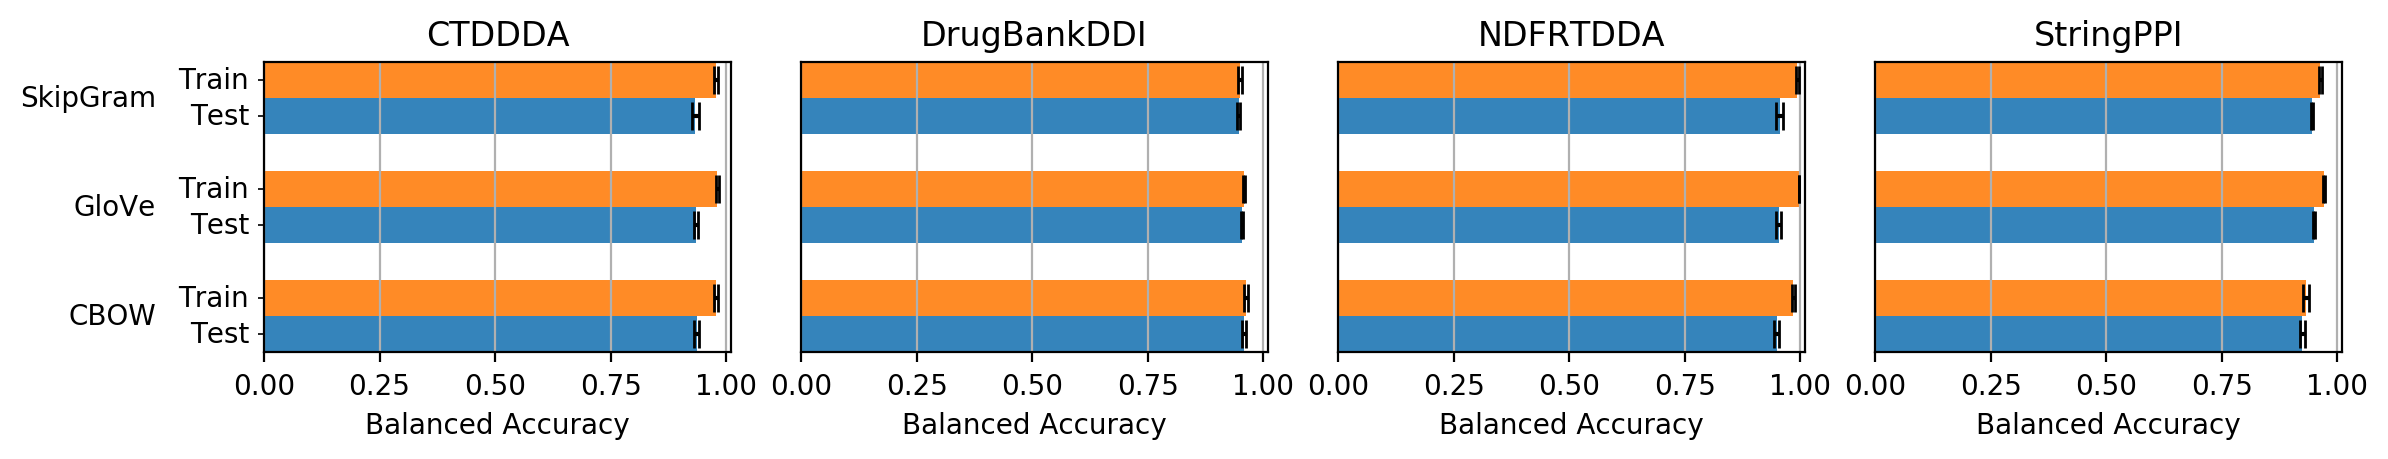

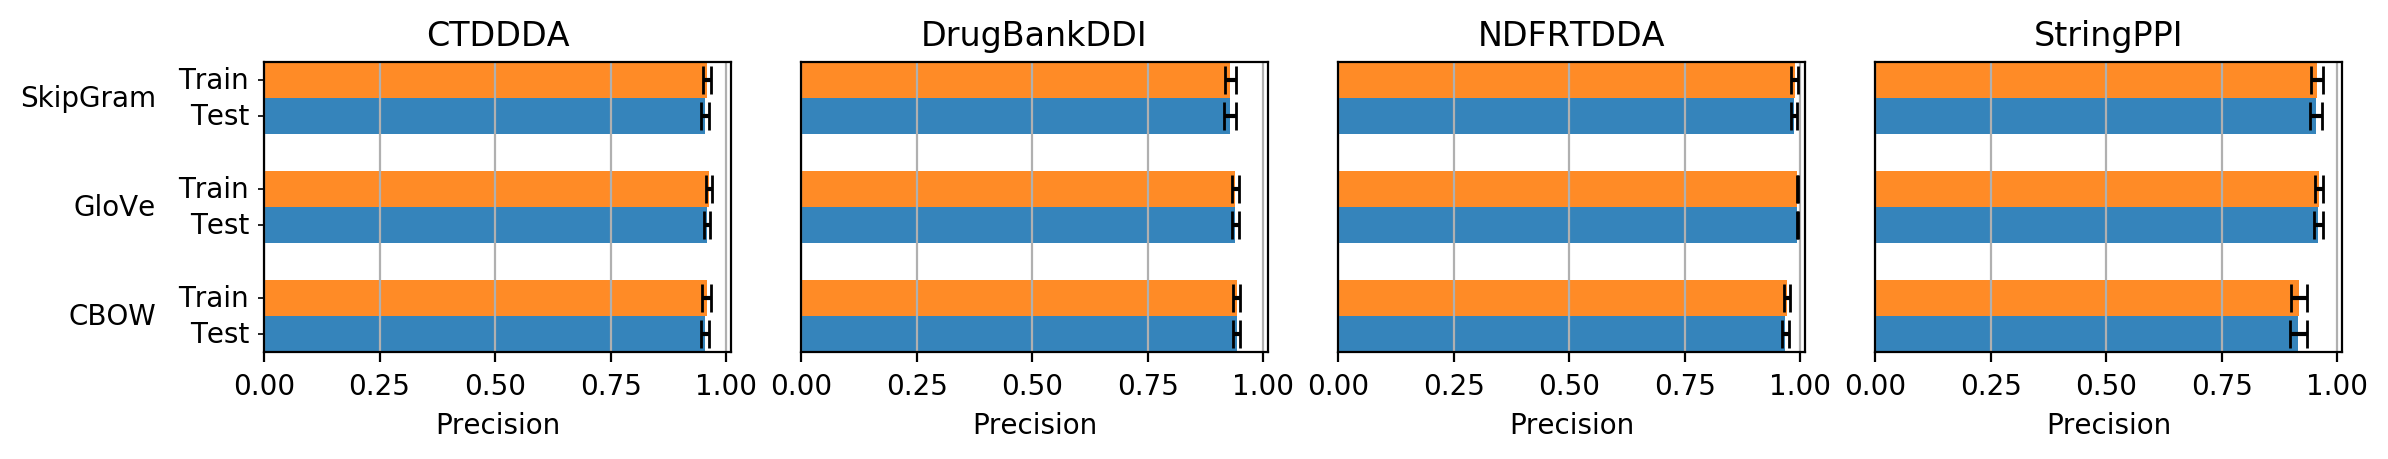

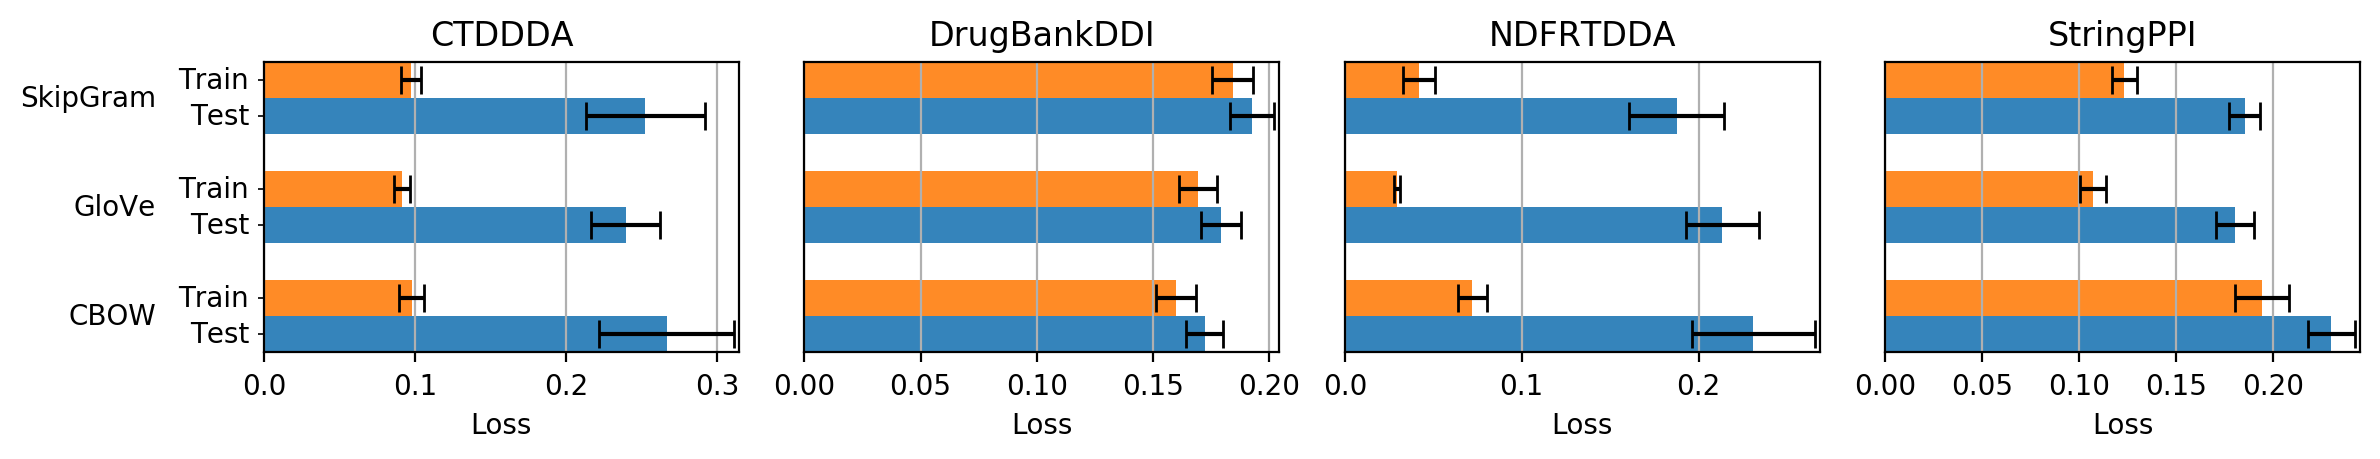

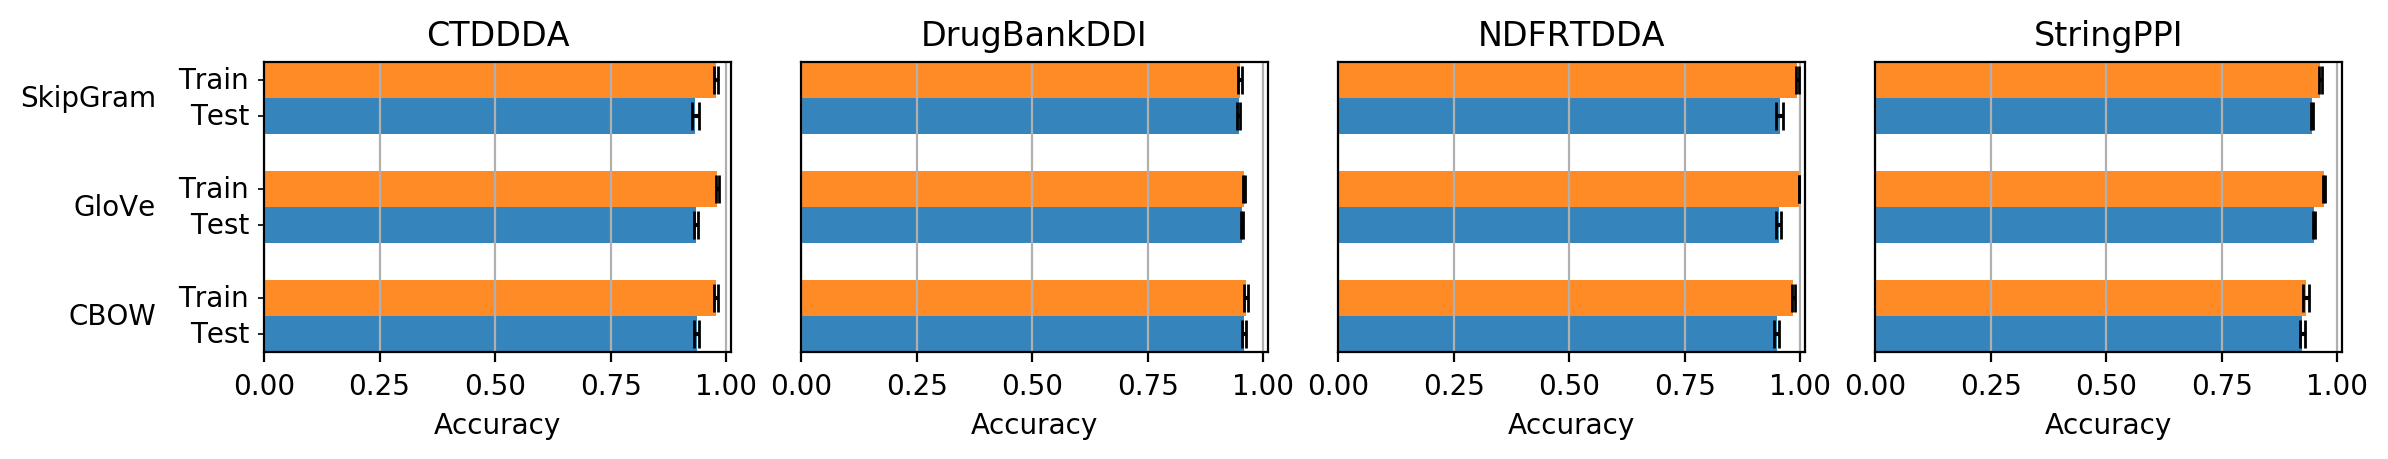

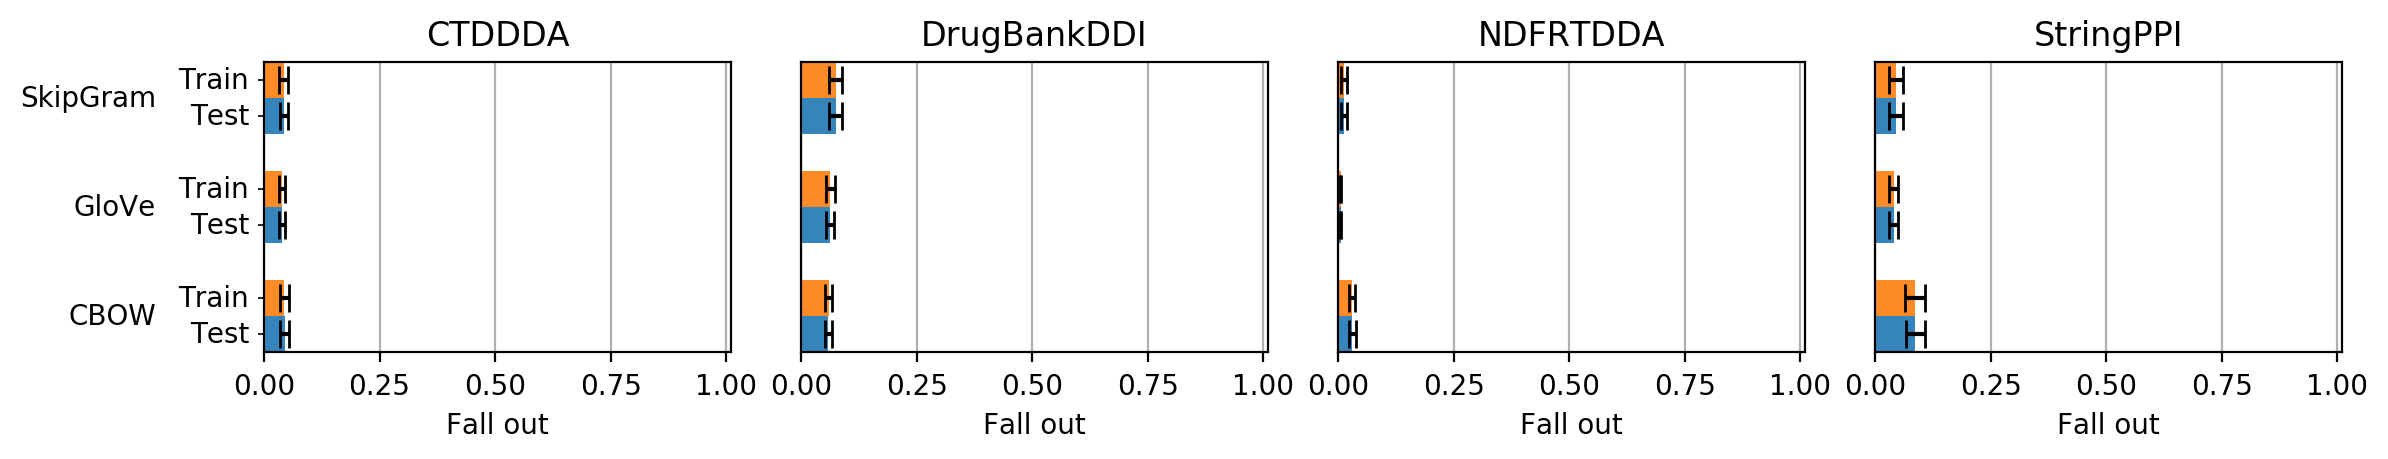

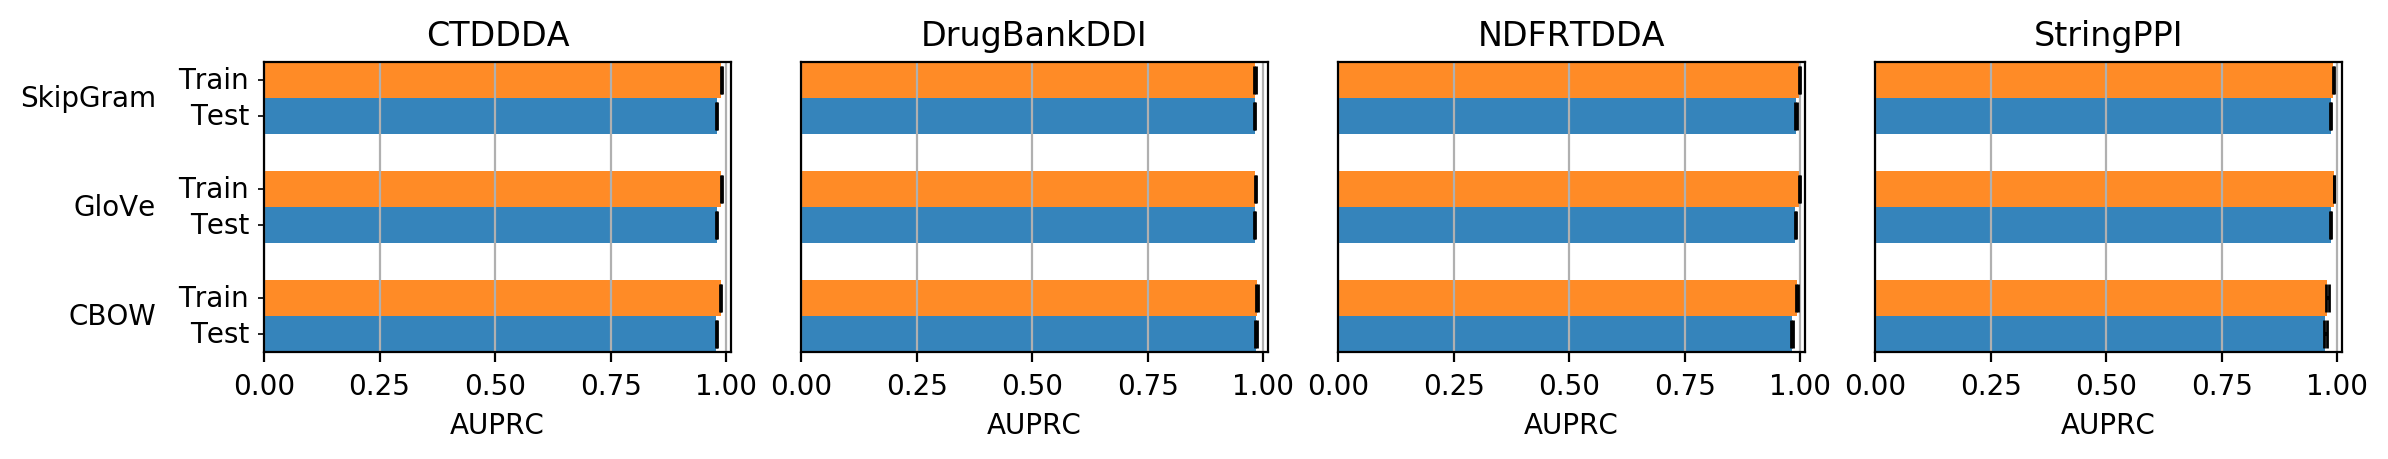

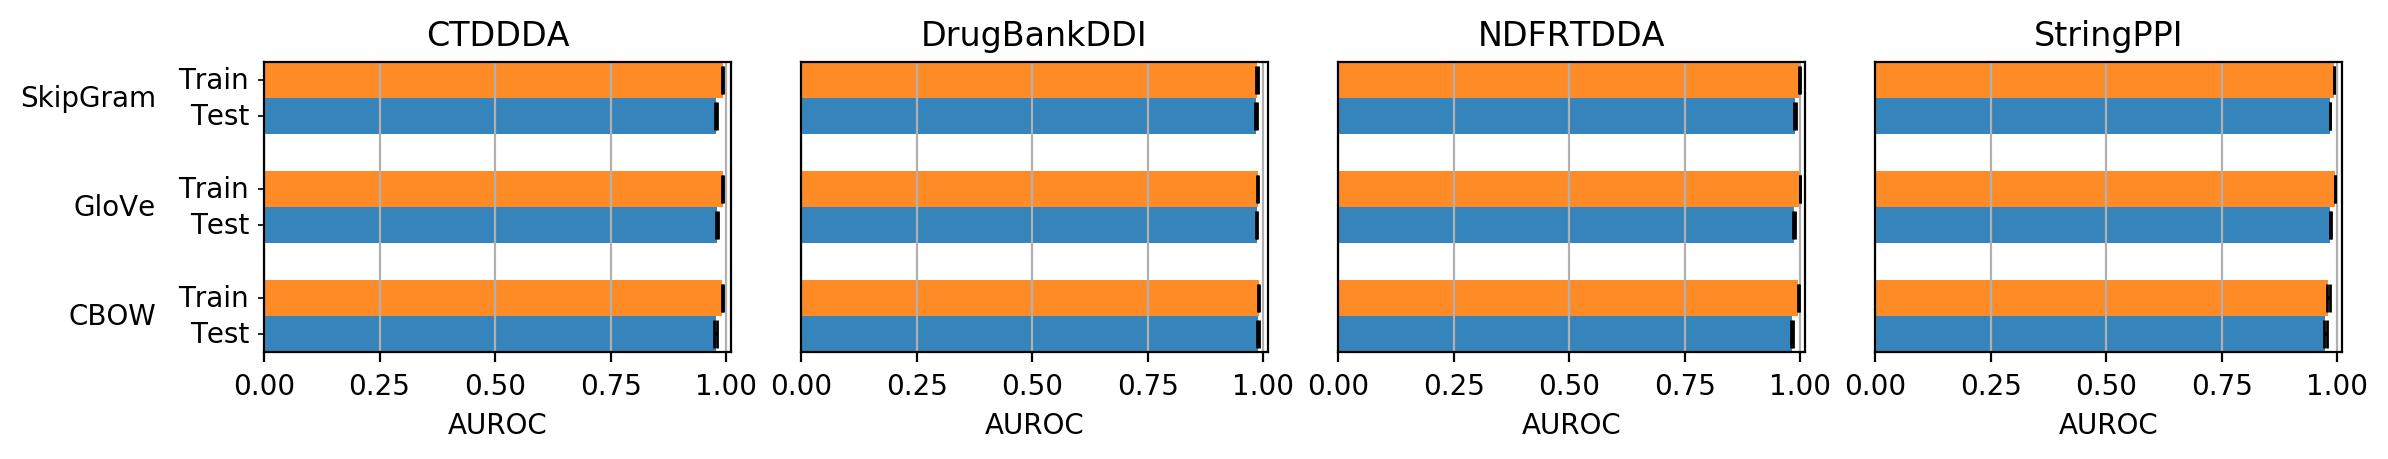

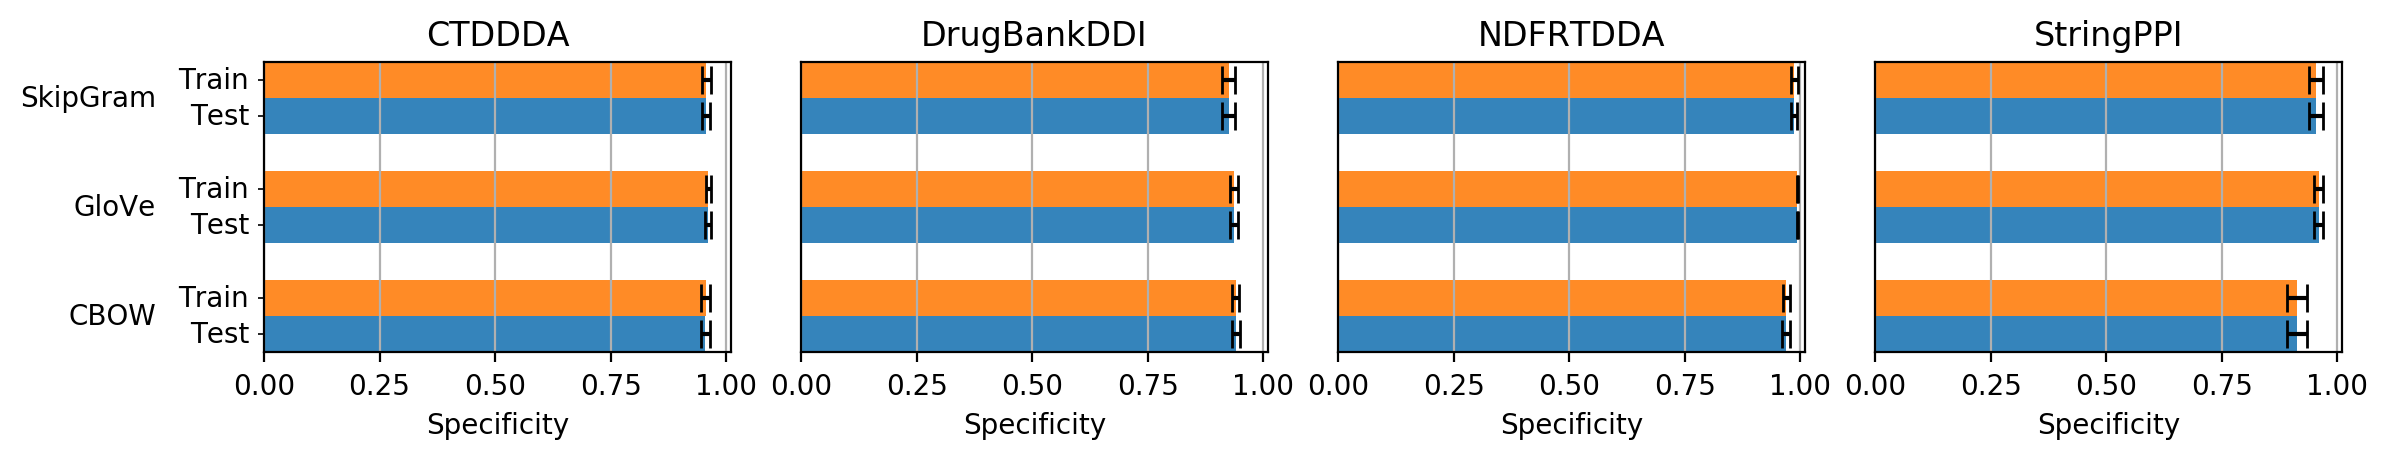

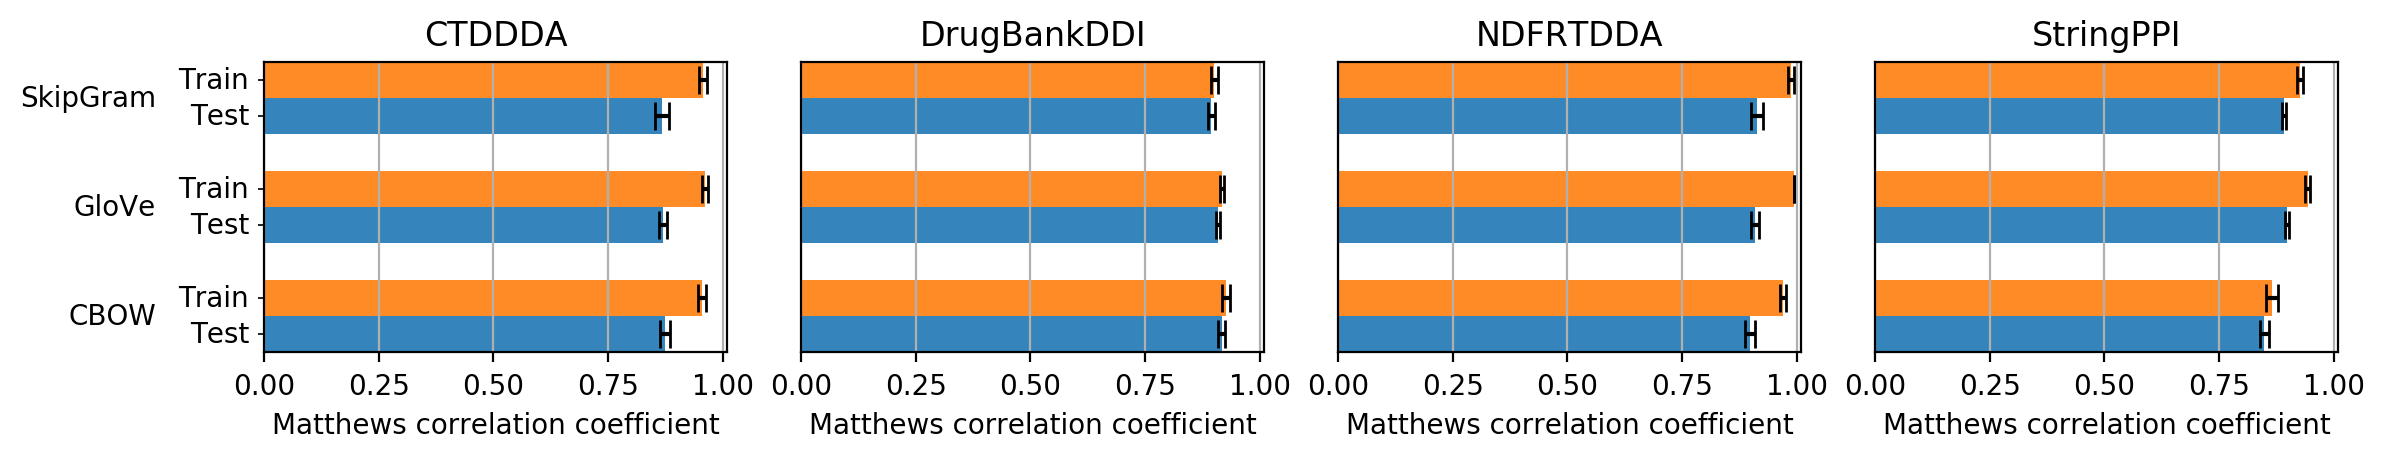

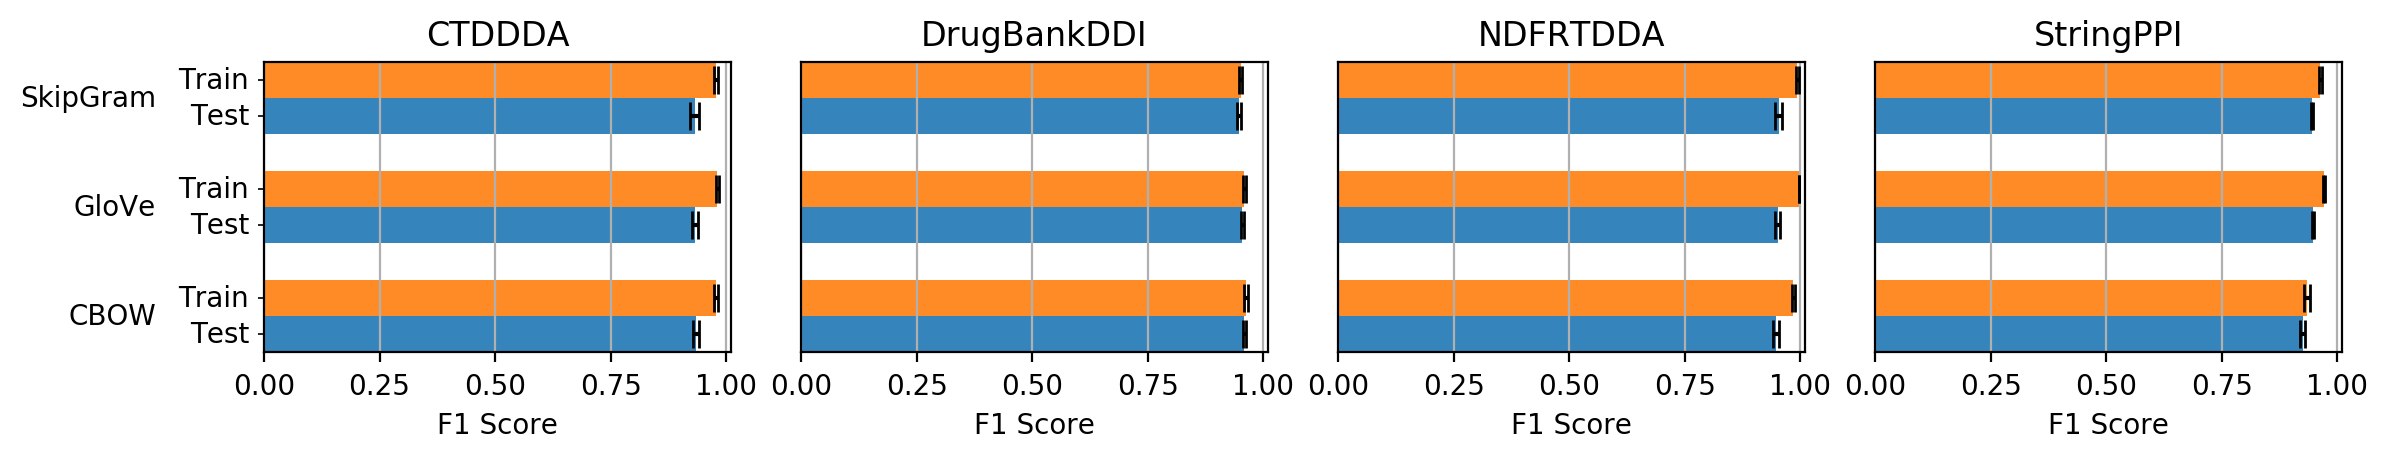

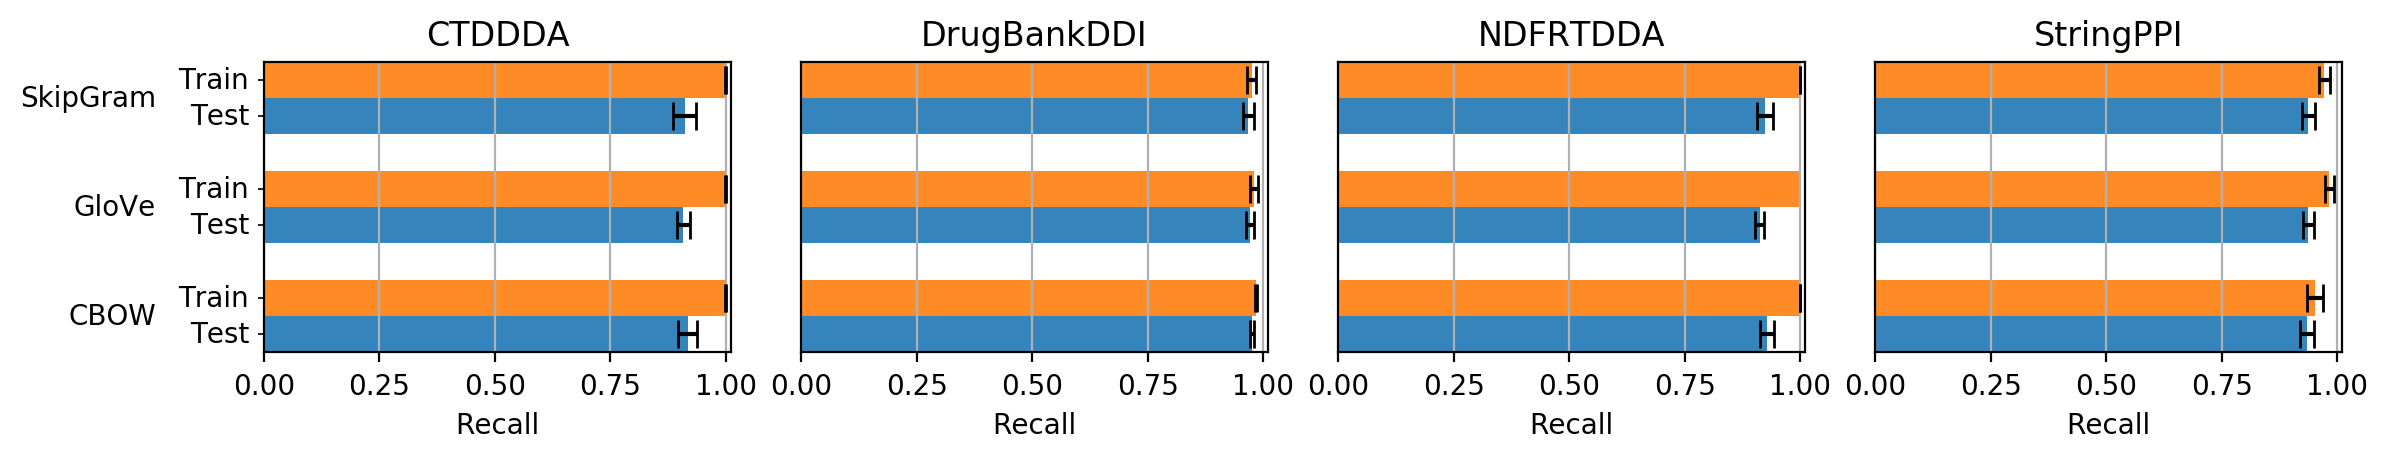

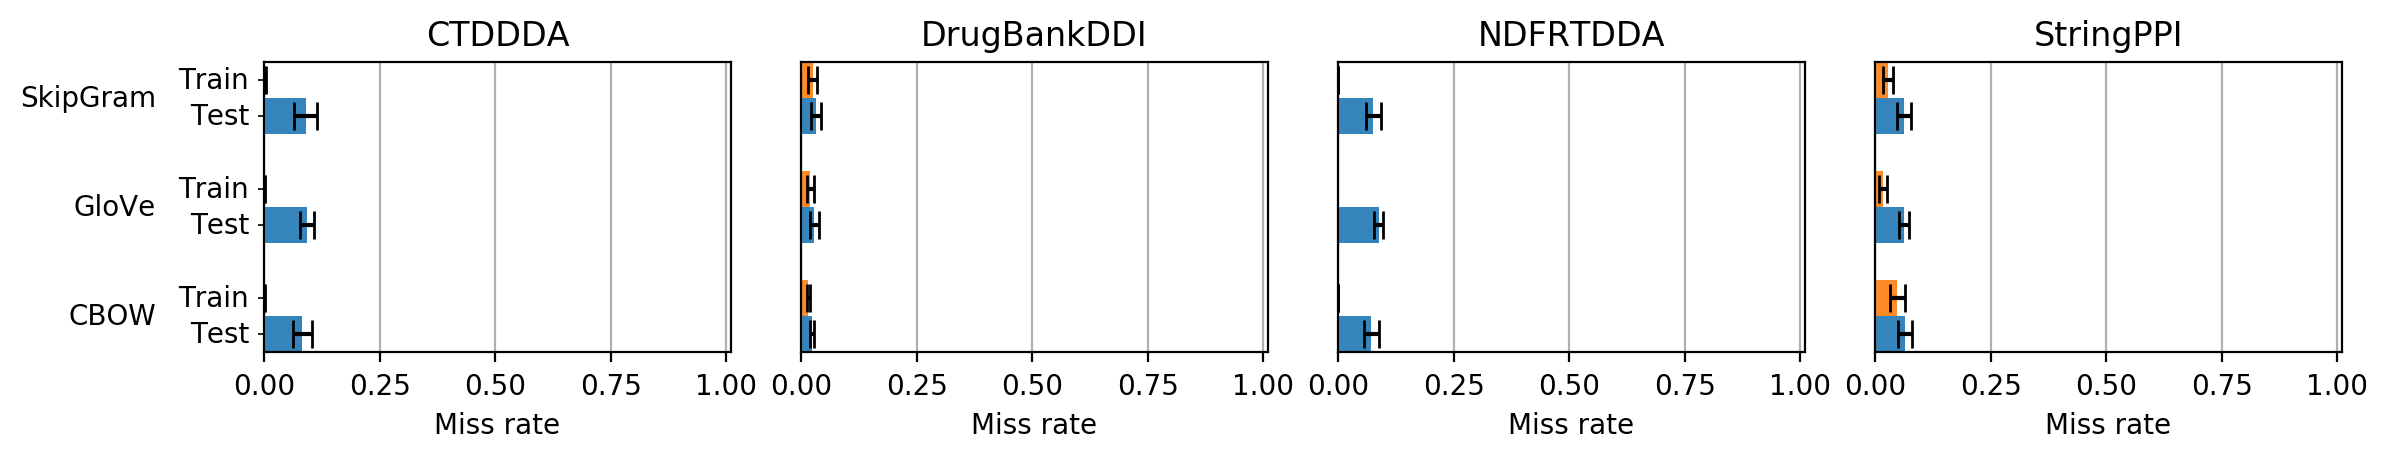

In [3]:
grape_results = pd.concat([
    pd.read_csv(path)
    for path in glob("yue_comparison*")
])
grape_results.graph = [
    graph[3:]
    for graph in grape_results.graph
]
grape_results = grape_results[grape_results.trainable==True]
grape_results.drop(columns=["trainable"], inplace=True)
_ = barplots(
    grape_results,
    groupby=["graph", "method", "run_type"],
    height=3,
    path = 'train_test_barplots/{feature}.png',
    subplots=True,
    orientation="horizontal",
    use_multiprocessing=False,
    show_legend=False,
    unique_minor_labels=True
)

In [4]:
grape_results = pd.concat([
    pd.read_csv(path)
    for path in glob("yue_comparison*")
])
grape_results.graph = [
    graph[3:]
    for graph in grape_results.graph
]
grape_results = grape_results[grape_results.trainable==True]
grape_results.drop(columns=["trainable"], inplace=True)
grape_results["work"] = "Grape"
grape_results = grape_results[grape_results.run_type=="test"]
indices = ["graph", "work", "method"]
grape_results = grape_results.groupby(indices).agg(["mean", "std"])
yue = pd.read_csv("yue_results.csv", index_col=[0,1,2], header=[0, 1]).reset_index()
yue = yue[~yue.method.isin(bad_models)]
yue["work"] = "Other"
yue = yue.set_index(indices)
all_results = pd.DataFrame(pd.concat([
    grape_results,
    yue
]).to_dict()).drop(columns=["run_type"])

In [5]:
all_results = all_results.sort_index()
all_results.to_csv("all_results.csv")

Rendering barplots:   0%|          | 0/3 [00:00<?, ?it/s]

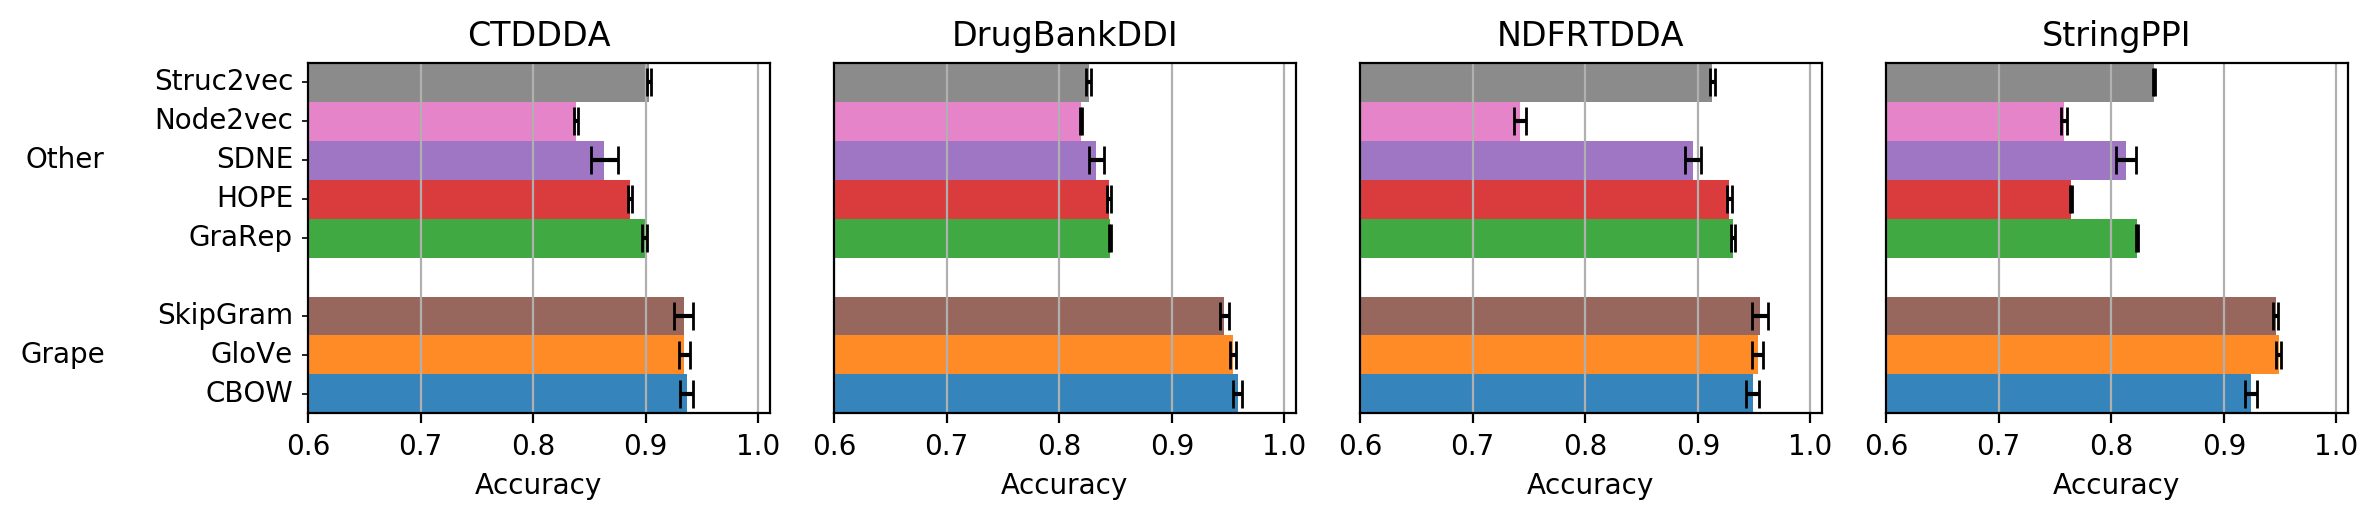

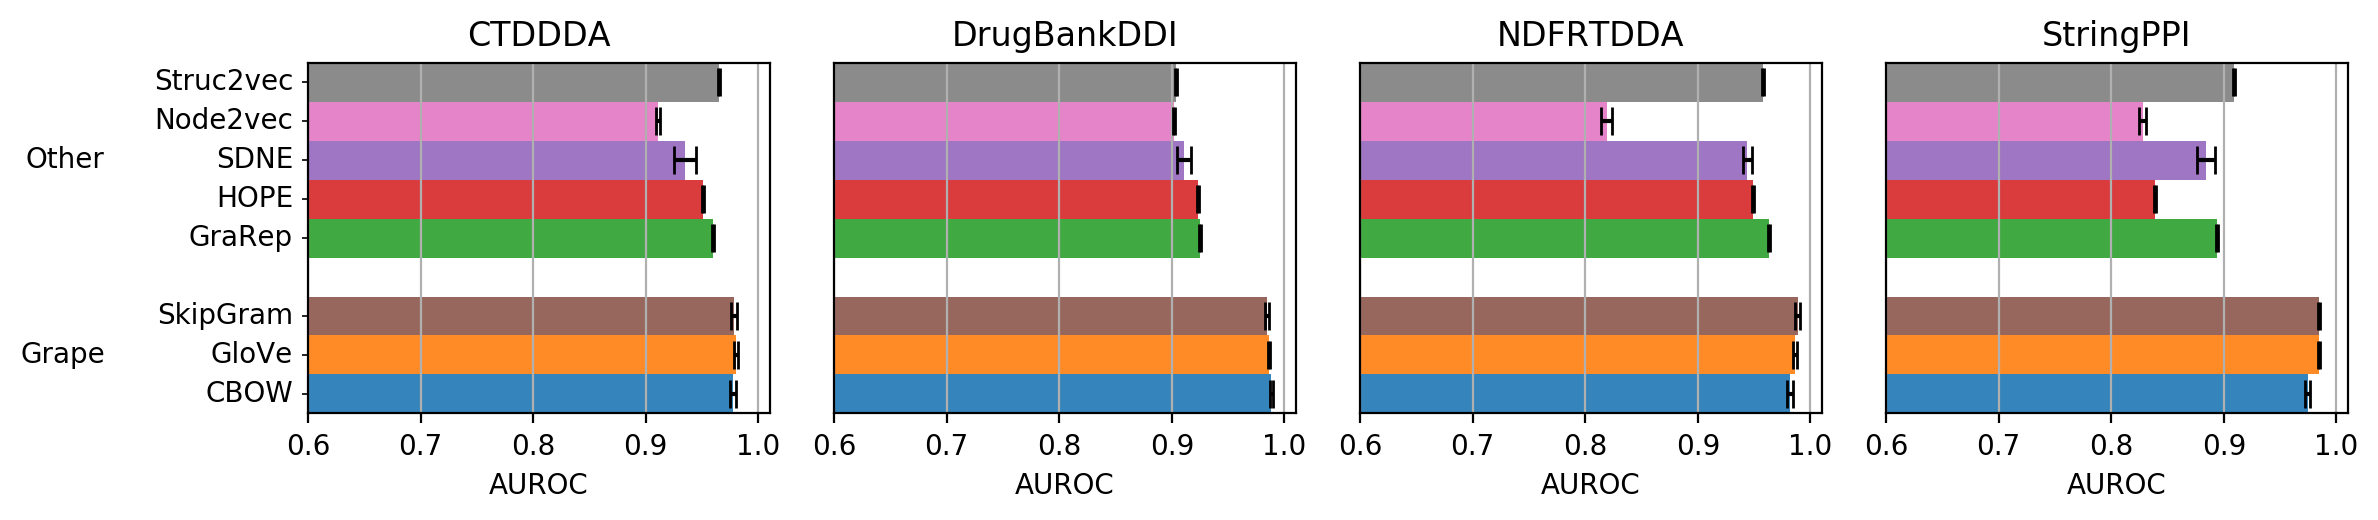

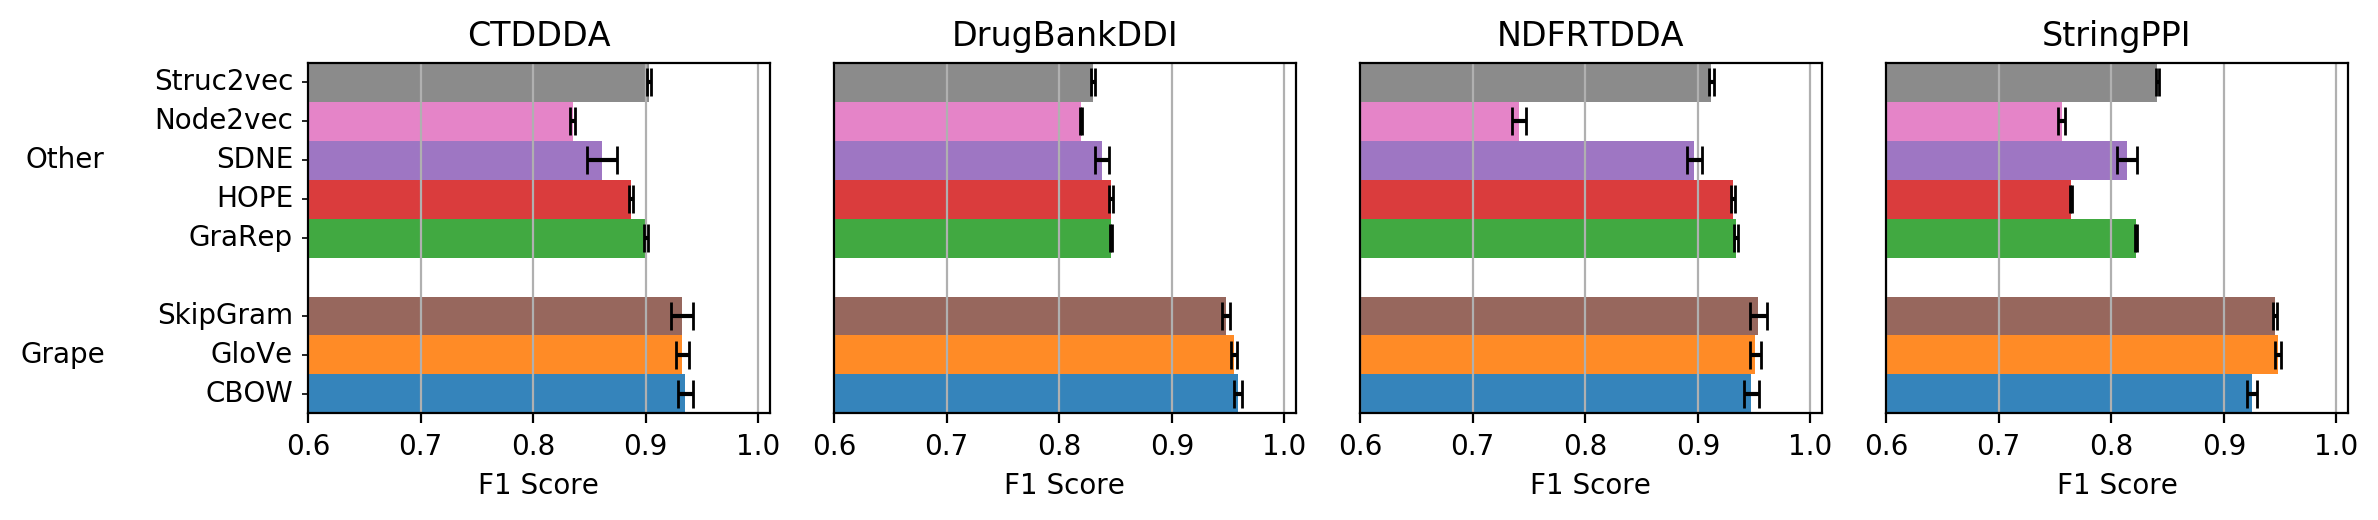

In [6]:
_ = barplots(
    all_results,
    height=3,
    min_value=0.6,
    subplots=True,
    path='comparison_barplots/{feature}.png',
    orientation="horizontal",
    use_multiprocessing=False,
    show_legend=False,
    unique_minor_labels=True
)